## The Sparks Foundation
#### GRIP(Graduate Rotational Internship Program) March- 2023
##### Name : Lathiya Shruti Pareshbhai
##### Domain : Data Science & Business Analytics
Task 1 - Prediction using Supervised Machine Learning
Problem Statement :
Predict the percentage of a student based on the number of study hours.

In [2]:
# Importing all libraries required in this notebook
from pandas import *
from numpy import *
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from math import sqrt
%matplotlib inline

In [5]:
# Reading data from remote link

stu_data = read_csv("E:/task1.csv")
print("Data Imported successfully")
stu_data.head(12)

Data Imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
   #Now we check for Null value if it's  present
stu_data.isna().sum() 

Hours     0
Scores    0
dtype: int64

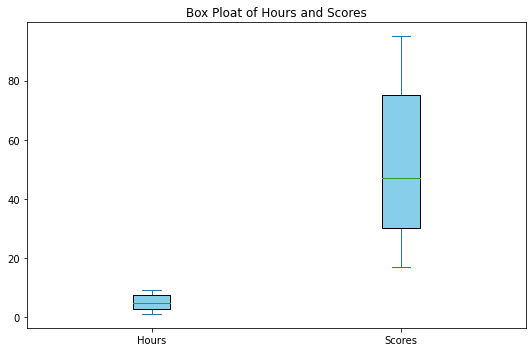

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
boxplot = stu_data[['Hours', 'Scores']].plot(kind = 'box', title = "Box Ploat of Hours and Scores" , 
                                             patch_artist=True,
                                            boxprops={'facecolor': 'skyblue',
                                            'edgecolor': 'black'}) 

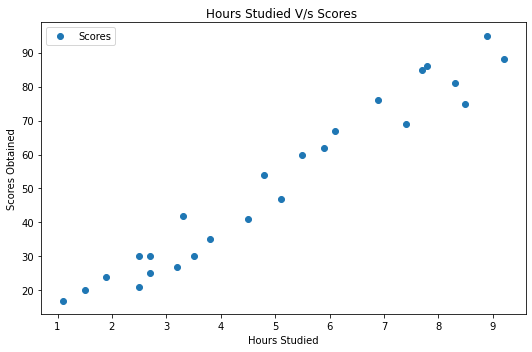

In [13]:
# Plotting the distribution of scores
stu_data.plot(x="Hours" , y = "Scores", style="o")
plt.title("Hours Studied V/s Scores ")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1.1, 1.5, 1.9, 2.5, 2.5, 2.7, 2.7, 3.2, 3.3, 3.5, 3.8, 4.5, 4.8,
         5.1, 5.5, 5.9, 6.1, 6.9, 7.4, 7.7, 7.8, 8.3, 8.5, 8.9, 9.2])),
 (2.583577905087343, 5.012, 0.9789402086868313))

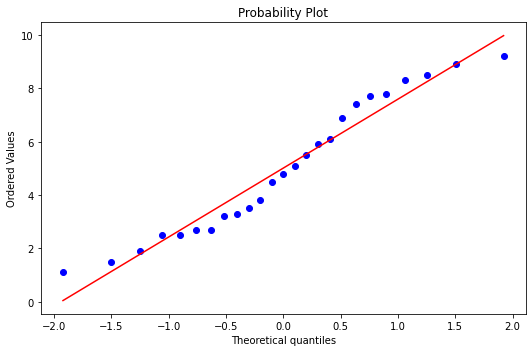

In [15]:
#Checking Normality by Graphical Representation
#For Hours
stats.probplot(stu_data['Hours'], plot = plt)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([17, 20, 21, 24, 25, 27, 30, 30, 30, 35, 41, 42, 47, 54, 60, 62, 67,
         69, 75, 76, 81, 85, 86, 88, 95], dtype=int64)),
 (25.58038152298867, 51.47999999999999, 0.9678851140595))

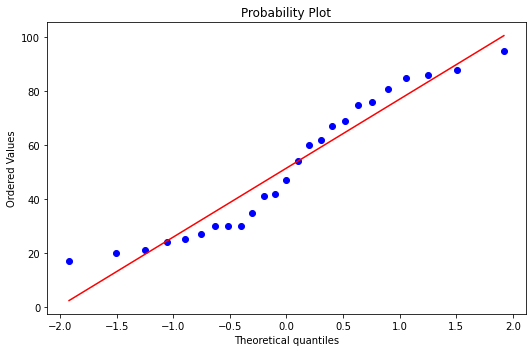

In [16]:
#For Scores
stats.probplot(stu_data['Scores'], plot = plt)

In [17]:
#Here we use Shapiro-Wilk normality test becase we have less than(<) 50 observation
stats.shapiro(stu_data['Hours'])

ShapiroResult(statistic=0.9401376247406006, pvalue=0.1491180658340454)

In [18]:
stats.shapiro(stu_data['Scores'])

ShapiroResult(statistic=0.9168438911437988, pvalue=0.04343847185373306)

Conclusion
Here,

we can see that P value for Hours Studied is 0.149 which is Greater than (>) 0.05 so we can accept H0 and conclude that data is normal at 5 % Level of Sgnificance

For Scores obtainded P value is 0.043 which is Greater than (>) 0.01 so we can accept H0 and conclude that data is normal at 1 % Level of Sgnificance



## Correlation between study hours and Scores obtained

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<AxesSubplot:>

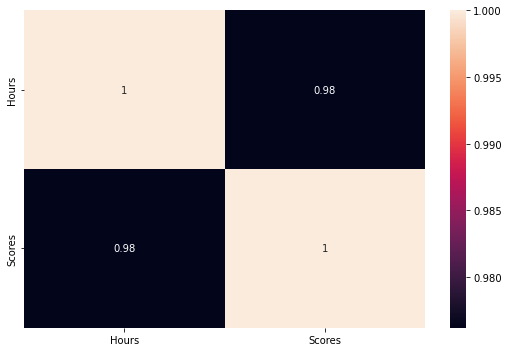

In [19]:
correlation = stu_data.corr()
print(correlation)

#Visualizing Correlation by heatmap
sns.heatmap(correlation,annot = True)

Conclusion :
Thus, From this we may conclude that there is highly possitive correlation between Hours studied and Scores Obtained

## Preparing the data :

In [20]:
x = stu_data.iloc[:, :-1].values  
y = stu_data.iloc[:, 1].values 

Split data into traning and testing:-
Here,the independent variable is 'Hours Studied' and dependent variable is 'Scores Obtained'.

to make predictions about the scores obtainded based on the number of hours studied.

we will run train test split method where we are going to divide the dataset in the ratio 8:2.

The 80% is the training dataset through which we are going to make prediction on the test set.

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print("Training Completed")

Training Completed


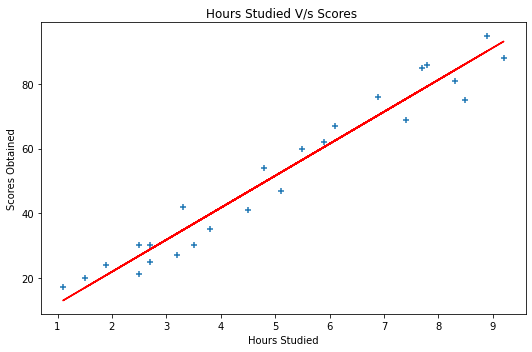

In [25]:
#plotting the regression line
line = reg.coef_*x+reg.intercept_ 

#plotting for the test data 
plt.scatter(x,y, marker = '+')
plt.plot(x , line , color = "red")
plt.title("Hours Studied V/s Scores ")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

## Making Predictions

In [27]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Computing actual v\s. predicted

In [29]:
y_pred = reg.predict(x_test)
df = DataFrame({"Actual Value" : y_test , "Predicted Value" : y_pred})
df

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
user_value = float(input("Enter Study hours to predict scores accordingly : "))
pre = reg.predict([[user_value]])
print("If Student study",user_value, "Hours daily, then score will be",pre[0])

Enter Study hours to predict scores accordingly : 8.5
If Student study 8.5 Hours daily, then score will be 86.2587401268937
